In [ ]:
!pwd

/content


In [ ]:
!pip install Dlib

In [ ]:
!pip install face_recognition

HOG Features


In [ ]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

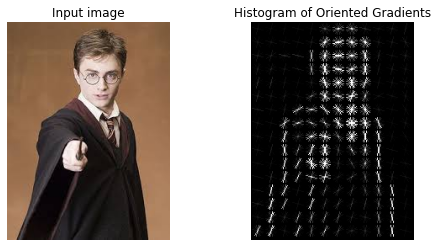

In [ ]:
image = cv2.imread('harry.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16), cells_per_block=(1,1), visualize=True, multichannel=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
len(fd)

1536

In [ ]:
image.shape

(259, 194, 3)

Face Detection

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

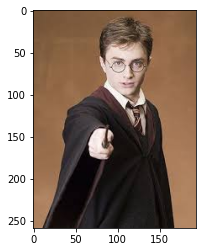

In [ ]:
image = cv2.imread('harry.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 1 face(s) in input image.


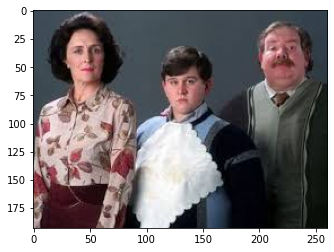

In [ ]:
image = cv2.imread('unknown4.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 3 face(s) in input image.


A face is located at pixel loaction Top: 113, Left: 54, Bottom: 149, Right: 90
A face is located at pixel loaction Top: 29, Left: 26, Bottom: 65, Right: 62
A face is located at pixel loaction Top: 199, Left: 22, Bottom: 242, Right: 65


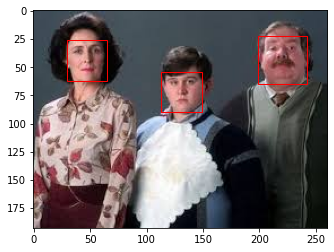

In [ ]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:

  top, right, bottom, left = face_location
  x,y,w,h = left, top, right, bottom
  print("A face is located at pixel loaction Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)

plt.show()  


Face Recognition

In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [ ]:
image = cv2.imread('snape.jfif')
snape = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('hermione.jfif')
hermione = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('ron.jfif')
ron = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('harry.jfif')
harry = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
snape_encoding = face_recognition.face_encodings(snape)[0]
hermione_encoding = face_recognition.face_encodings(hermione)[0]
ron_encoding = face_recognition.face_encodings(ron)[0]
harry_encoding = face_recognition.face_encodings(harry)[0]

known_face_encodings = [
                        snape_encoding,
                        hermione_encoding,
                        ron_encoding,
                        harry_encoding
]

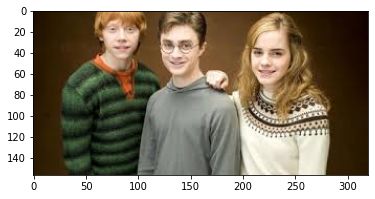

In [ ]:
image = cv2.imread('unknown2.jfif')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

counter = 0

for unknown_face_encoding in unknown_face_encodings:
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold=0.6 
  results = np.array(results) <= threshold
  
  name = "Uknown"

  if results[0]:
    name = "Snape"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[1]:
    name = "Hermione"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[2]:
    name = "Ron"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[3]:
    name = "Harry"
    print(f"Found {name} in the photo!")
    counter = 1

if counter==0: 
  print(f"Found unknown people in the photo!")

Found Hermione in the photo!
Found Harry in the photo!
Found Ron in the photo!


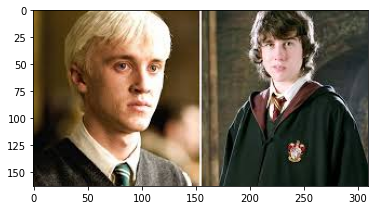

In [ ]:
image = cv2.imread('unknown3.jfif')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [ ]:
from scipy.spatial import distance

counter = 0

for unknown_face_encoding in unknown_face_encodings:
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold=0.6 
  results = np.array(results) <= threshold
  
  name = "Uknown"

  if results[0]:
    name = "Snape"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[1]:
    name = "Hermione"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[2]:
    name = "Ron"
    print(f"Found {name} in the photo!")
    counter = 1
  elif results[3]:
    name = "Harry"
    print(f"Found {name} in the photo!")
    counter = 1

if counter==0: 
  print(f"Found unknown people in the photo!")

Found unknown people in the photo!


Facial Landmarks

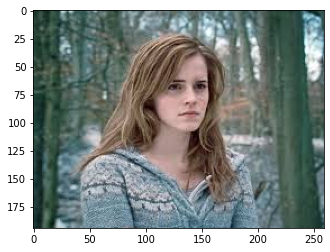

In [ ]:
image = cv2.imread('hermione.jfif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

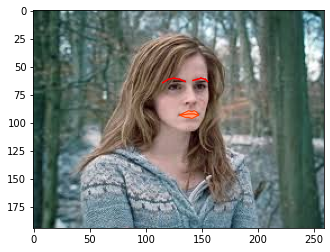

In [ ]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:

  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x,pre_y = x,y


  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color='red')
    ax.add_line(l)
    pre_x,pre_y =x,y

  p = Polygon(face_landmarks['top_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor='lightsalmon', edgecolor='orangered')
  ax.add_patch(p)


plt.show()



 